Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [7]:
import pandas as pd 
import numpy as np
import time
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool 
from xgboost import XGBRegressor
import plotly.io as pio

In [8]:
df_car = pd.read_csv("datasets/car_data.csv")
df_car.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [9]:
try:
    df_car = pd.read_csv("datasets/car_data.csv")
except FileNotFoundError:
    df_car = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/car_data.csv')

In [10]:
df_car.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [11]:
df_car.tail()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15
354368,20/03/2016 19:41,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,20/03/2016 00:00,0,40764,24/03/2016 12:45


In [12]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [13]:
df_car.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [14]:
df_car.describe(include='object')

,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,15470,8,2,250,7,40,2,109,18592
top,05/03/2016 14:25,sedan,manual,golf,petrol,volkswagen,no,03/04/2016 00:00,07/04/2016 07:16
freq,66,91457,268251,29232,216352,77013,247161,13719,654


In [15]:
print(df_car.shape[0])
print(df_car.duplicated().sum())
df_car = df_car.drop_duplicates(keep='first').reset_index()
print(df_car.shape[0])

354369
262
354107


In [16]:
df_car.isna().sum()

index                    0
DateCrawled              0
Price                    0
VehicleType          37484
RegistrationYear         0
Gearbox              19830
Power                    0
Model                19701
Mileage                  0
RegistrationMonth        0
FuelType             32889
Brand                    0
NotRepaired          71145
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [17]:
# dropping unnecessary columns
df_car.drop(columns=['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], inplace=True)

In [18]:
# inspecting high values
df_car.loc[df_car['RegistrationYear'] > 2016].head()

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
22,22,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no
26,26,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no
48,48,7750,NaN,2017,manual,80,golf,100000,1,petrol,volkswagen,NaN
51,51,2000,NaN,2017,manual,90,punto,150000,11,gasoline,fiat,yes
57,57,2399,NaN,2018,manual,64,other,125000,3,NaN,seat,no


In [19]:
df_car = df_car.loc[df_car['RegistrationYear'] <= 2016]

The data is from 2016, so it is impossible for a car's registration year to be later than that. it is best to remove these rows from the dataset because it is hard to estimate the coreect registration year accurately.

In [20]:
df_car.loc[df_car['Power'] > 1499]

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
2102,2102,0,sedan,1999,NaN,1799,vectra,150000,1,petrol,opel,yes
7661,7661,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,NaN
9664,9664,2599,NaN,2016,manual,1779,zafira,150000,0,petrol,opel,no
9875,9875,550,wagon,2003,manual,1753,focus,150000,1,gasoline,ford,yes
11039,11039,0,sedan,1998,manual,10317,other,150000,8,petrol,fiat,no
...,...,...,...,...,...,...,...,...,...,...,...,...
347751,348006,355,sedan,1998,manual,1799,vectra,150000,6,petrol,opel,NaN
347882,348137,850,sedan,1993,auto,9012,golf,150000,0,petrol,volkswagen,NaN
347982,348237,3000,coupe,2007,manual,2007,corsa,150000,3,gasoline,opel,yes
348412,348668,1000,wagon,1996,manual,2598,a6,150000,7,NaN,audi,NaN


In [21]:
df_car = df_car.loc[df_car['Power'] <= 1499]

A Google search reveals that the highest horsepower available fo a car in 2016  was 1,499. Values exceeding 1,499 indicate inaccurate data and constitute only 0.0005 of the entire datset. Consequently, these rows are discarded rather than being replaced with an estimate.

In [22]:
df_car.loc[df_car['RegistrationYear'] < 1960]

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
15,15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN
622,622,0,NaN,1111,NaN,0,NaN,5000,0,NaN,opel,NaN
1928,1928,7000,suv,1945,manual,48,other,150000,2,petrol,volkswagen,no
2273,2273,1800,convertible,1925,NaN,0,NaN,5000,1,NaN,sonstige_autos,no
3333,3333,10500,sedan,1955,manual,30,other,60000,0,petrol,ford,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
351041,351299,5500,bus,1956,manual,37,NaN,60000,4,petrol,sonstige_autos,no
351423,351682,11500,NaN,1800,NaN,16,other,5000,6,petrol,fiat,NaN
353270,353531,6000,sedan,1937,manual,38,other,5000,0,petrol,mercedes_benz,NaN
353699,353961,200,NaN,1910,NaN,0,NaN,5000,0,petrol,sonstige_autos,NaN


In [23]:
df_car = df_car.loc[df_car['RegistrationYear'] > 1960]

0.001 of the dataset contains records with a registration year before 1960. These records could be errors or, more likely, indicate antique cars. Considering that it is highly unlikely for a used car older than 60 years to be sold compared to newer models, these records will also be discarded.

In [24]:
df_car.loc[df_car['Price'] <= 100].head()

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
7,7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no
40,40,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN
59,59,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN
89,89,1,sedan,1995,manual,113,e_klasse,150000,4,gasoline,mercedes_benz,no
115,115,0,small,1999,NaN,0,NaN,5000,0,petrol,volkswagen,NaN


In [25]:
df_car = df_car.loc[df_car['Price'] > 100]

Entries with a price of 100 or less will be excluded form the analysis. It is highly unlikely that a user would sell their car for such a low price. Therefore, dropping these rows will help prevent any potential bias in the results. Price is the primary variable of interest here, so this action is necessary to ensure the accuracy of the analysis.

In [26]:
# checking these columns for unusual values
df_car['VehicleType'].value_counts()

VehicleType
sedan          88730
small          76885
wagon          63278
bus            28211
convertible    19750
coupe          15487
suv            11715
other           2996
Name: count, dtype: int64

In [27]:
df_car['Gearbox'].value_counts()

Gearbox
manual    248603
auto       62657
Name: count, dtype: int64

In [28]:
df_car['Model'].value_counts()

Model
golf                  26459
other                 22727
3er                   18532
polo                  11808
corsa                 11316
                      ...  
kalina                    6
rangerover                3
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: count, Length: 250, dtype: int64

In [29]:
df_car['FuelType'].value_counts()

FuelType
petrol      202398
gasoline     94483
lpg           5006
cng            527
hybrid         219
other          146
electric        85
Name: count, dtype: int64

In [30]:
df_car['Brand'].value_counts()

Brand
volkswagen        69998
opel              36062
bmw               34429
mercedes_benz     30129
audi              27441
ford              23044
renault           16157
peugeot           10306
fiat               8725
seat               6282
skoda              5270
mazda              5204
smart              4935
citroen            4723
nissan             4567
toyota             4377
hyundai            3375
mini               3048
volvo              3021
mitsubishi         2785
honda              2574
sonstige_autos     2438
kia                2288
suzuki             2170
alfa_romeo         2120
chevrolet          1633
chrysler           1304
dacia               861
daihatsu            727
subaru              701
porsche             691
jeep                617
land_rover          525
saab                501
daewoo              492
jaguar              481
trabant             445
rover               427
lancia              425
lada                206
Name: count, dtype: int64

In [31]:
# inspecting 0 values in registration month and power
df_car.loc[df_car['RegistrationMonth'] == 0].head()

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
9,9,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN
16,16,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN
36,36,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN
54,54,4700,wagon,2005,manual,0,signum,150000,0,NaN,opel,no


In [32]:
df_car = df_car.loc[df_car['RegistrationMonth'] > 0]

The correct range for Registration month is from 1 to 12. It is challenging to precisely determine the correct registration month, so entries with a Registration month of 0 will be dropped.

In [33]:
df_car.loc[df_car['Power'] == 0].head()

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
32,32,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no
37,37,1500,NaN,2016,NaN,0,kangoo,150000,1,gasoline,renault,no
55,55,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes
70,70,800,small,1993,manual,0,polo,150000,3,petrol,volkswagen,no
90,90,2400,sedan,2003,manual,0,a4,150000,9,gasoline,audi,NaN


In [34]:
df_car = df_car.loc[df_car['Power'] > 0]

Since the datset spans a wide range of years and horsepower has significantly increased over time, it becomes challenging  to determine the accurate horsepower for these entries. Consequently, these rows will be removed from the dataset. 

In [35]:
# missing values in model
df_car.loc[df_car['Model'].isna()].head()

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
1,1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
81,81,350,small,1997,manual,54,NaN,150000,3,NaN,fiat,yes
151,151,6799,small,2009,NaN,60,NaN,20000,5,petrol,volkswagen,no
161,161,1495,wagon,2001,NaN,64,NaN,150000,9,gasoline,volkswagen,NaN
273,273,1500,coupe,1994,manual,116,NaN,150000,8,NaN,audi,no


<Axes: >

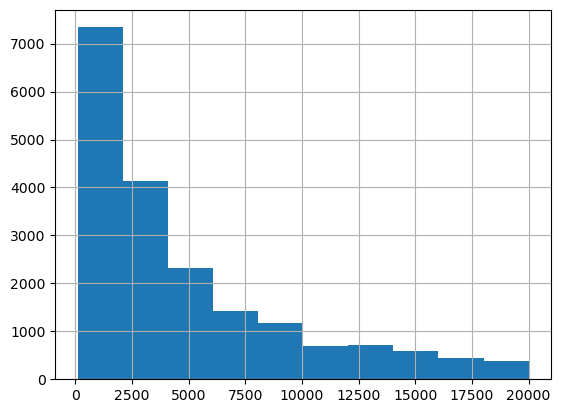

In [36]:
df_car.loc[df_car['Model'] == 'other', 'Price'].hist()

In [37]:
df_car.groupby('Model')['Price'].median()

Model
100         1300.0
145          750.0
147         2000.0
156         1350.0
159         6500.0
            ...   
yaris       3500.0
yeti       12990.0
ypsilon      999.0
z_reihe     9900.0
zafira      3299.0
Name: Price, Length: 249, dtype: float64

In [38]:
# filled in NaN with unknown
df_car['Model'] = df_car['Model'].fillna('unknown')

Initially, I thought of grouping NA values in the Model column into the 'other' category. However, after understanding that the model significantly impacts the final price of a car, I decided to remove the rows containing NA and 'other' values in the Model column.

In [39]:
df_car.loc[df_car['VehicleType'].isna()]

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
31,31,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,NaN
35,35,350,NaN,2016,manual,75,golf,150000,4,petrol,volkswagen,no
52,52,1400,NaN,2016,manual,55,other,5000,1,NaN,hyundai,NaN
71,71,2300,NaN,1997,manual,150,5er,150000,3,NaN,bmw,no
77,77,800,NaN,2000,manual,90,golf,150000,2,gasoline,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
353806,354068,3700,NaN,2016,manual,90,golf,150000,4,gasoline,volkswagen,NaN
353845,354107,395,NaN,2016,manual,60,golf,150000,12,petrol,volkswagen,NaN
353853,354115,299,NaN,2016,manual,60,astra,150000,4,petrol,opel,yes
354089,354351,1900,NaN,2000,manual,110,unknown,150000,7,NaN,volkswagen,no


In [40]:
df_car['VehicleType'].fillna(df_car.groupby('Model')['VehicleType'].transform(lambda x:x.value_counts().index[0]), inplace=True)

C:\Users\IU STUDENT\AppData\Local\Temp\ipykernel_9608\3277406770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car['VehicleType'].fillna(df_car.groupby('Model')['VehicleType'].transform(lambda x:x.value_counts().index[0]), inplace=True)


VehicleType's NA values are replaced with the mode of each car model because vehicle type usually remains consistent with the car model.

In [41]:
df_car.loc[df_car['Gearbox'].isna()]

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
151,151,6799,small,2009,NaN,60,unknown,20000,5,petrol,volkswagen,no
161,161,1495,wagon,2001,NaN,64,unknown,150000,9,gasoline,volkswagen,NaN
208,208,2250,small,2001,NaN,41,fortwo,150000,10,gasoline,smart,no
276,276,2400,convertible,2001,NaN,115,golf,150000,8,petrol,volkswagen,no
294,294,2390,small,2016,NaN,83,jazz,150000,12,petrol,honda,no
...,...,...,...,...,...,...,...,...,...,...,...,...
353291,353552,11950,bus,2012,NaN,109,kangoo,90000,8,gasoline,renault,no
353403,353664,2350,sedan,2002,NaN,75,golf,125000,6,NaN,volkswagen,NaN
353630,353892,7900,bus,2009,NaN,140,unknown,125000,7,gasoline,sonstige_autos,no
353871,354133,250,small,1994,NaN,75,golf,150000,6,petrol,volkswagen,no


In [42]:
df_car['Gearbox'].fillna(df_car.groupby('Model')['Gearbox'].transform(lambda x:x.value_counts().index[0]), inplace=True)

C:\Users\IU STUDENT\AppData\Local\Temp\ipykernel_9608\2390945874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car['Gearbox'].fillna(df_car.groupby('Model')['Gearbox'].transform(lambda x:x.value_counts().index[0]), inplace=True)


Similarly, in Gearbox, NA values are replaced with the mode of each car model because the gearbox type usually remains consistent with the car model.

In [43]:
df_car.loc[df_car['FuelType'].isna()]

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
13,13,2500,wagon,2004,manual,131,passat,150000,2,NaN,volkswagen,no
41,41,7500,sedan,2002,auto,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
52,52,1400,sedan,2016,manual,55,other,5000,1,NaN,hyundai,NaN
71,71,2300,sedan,1997,manual,150,5er,150000,3,NaN,bmw,no
81,81,350,small,1997,manual,54,unknown,150000,3,NaN,fiat,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
354003,354265,3000,sedan,2001,auto,150,a4,150000,8,NaN,audi,yes
354065,354327,2999,wagon,2004,manual,234,vectra,100000,1,NaN,opel,NaN
354077,354339,3850,convertible,2006,manual,108,2_reihe,125000,2,NaN,peugeot,no
354089,354351,1900,sedan,2000,manual,110,unknown,150000,7,NaN,volkswagen,no


In [44]:
df_car['FuelType'].fillna(df_car.groupby('Model')['FuelType'].transform(lambda x:x.value_counts().index[0]), inplace=True)

C:\Users\IU STUDENT\AppData\Local\Temp\ipykernel_9608\1605539551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car['FuelType'].fillna(df_car.groupby('Model')['FuelType'].transform(lambda x:x.value_counts().index[0]), inplace=True)


NA values in FuelType are replaced with the fuel type of each respective car nodel, as fuel type usually remains consistent with the car model.

In [45]:
df_car.loc[df_car['NotRepaired'].isna()].head()

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
2,2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
8,8,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN
12,12,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,NaN
31,31,899,small,2016,manual,60,clio,150000,6,petrol,renault,NaN
41,41,7500,sedan,2002,auto,306,e_klasse,150000,4,gasoline,mercedes_benz,NaN


In [46]:
df_car['NotRepaired'].value_counts()

NotRepaired
no     217809
yes     25460
Name: count, dtype: int64

In [47]:
df_car['NotRepaired'].fillna('no', inplace=True)

C:\Users\IU STUDENT\AppData\Local\Temp\ipykernel_9608\2300424277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car['NotRepaired'].fillna('no', inplace=True)


NotRepaired values with NA are replaced with the value 'no', which is the most frequently used value across the entire dataset.

In [48]:
# finding duplicates
df_car.duplicated().sum()

0

In [49]:
print(df_car.shape[0])
print(df_car.duplicated().sum())
df_car = df_car.drop_duplicates(keep='first').reset_index()
print(df_car.shape[0])


276994
0
276994


In [50]:
df_car.head()

,level_0,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
0,1,1,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes
1,2,2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no
2,3,3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
3,4,4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
4,5,5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes


In [51]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276994 entries, 0 to 276993
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   level_0            276994 non-null  int64 
 1   index              276994 non-null  int64 
 2   Price              276994 non-null  int64 
 3   VehicleType        276994 non-null  object
 4   RegistrationYear   276994 non-null  int64 
 5   Gearbox            276994 non-null  object
 6   Power              276994 non-null  int64 
 7   Model              276994 non-null  object
 8   Mileage            276994 non-null  int64 
 9   RegistrationMonth  276994 non-null  int64 
 10  FuelType           276994 non-null  object
 11  Brand              276994 non-null  object
 12  NotRepaired        276994 non-null  object
dtypes: int64(7), object(6)
memory usage: 27.5+ MB


We will divide the data into 3 sets: training (60%), validation(20%), and test(20%). This 3:1:1 ratio accounts for the fact that the test data originates from the same source. If the test data were separate, we would only need to split the source data into training and validation sets. The validation set would then make up 25% of the source data to maintain the same split ratio.

In [52]:
# Extract the feature variables
features = df_car.drop(['Price'], axis=1)

# Extract the target variable 'Price'
target = df_car['Price']

# Split data: 60% for training, 20% for validation, and 20% for testing
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Further split the remaining 40% into validation (20%) and test (20%) sets
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

# Print the size of each dataset
print('Training Features Size:', features_train.shape)
print()
print('Validation Features Size:', features_valid.shape)
print()
print('Test Features Size:', features_test.shape)

Training Features Size: (166196, 12)

Validation Features Size: (55399, 12)

Test Features Size: (55399, 12)


With the data split correctly, we will encode categorial features using 2 methods: label encoding for Random Forest and XGBoost, and one-hot encoding for Linear Regression. CatBoost and LightGBM handle categoricals internally, so no additional encoding is needed. This ensures each model gets the best encoding for its needs.

We will explicitly define our categorial features to simplify encoding.

In [53]:
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [54]:
# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform on training features
features_train_encoded = features_train.copy()
features_train_encoded[categorical_features] = ordinal_encoder.fit_transform(features_train[categorical_features])

# Fit and transform validation features
features_valid_encoded = features_valid.copy()
features_valid_encoded[categorical_features] = ordinal_encoder.transform(features_valid[categorical_features])

# Fit and transform test features
features_test_encoded = features_test.copy()
features_test_encoded[categorical_features] = ordinal_encoder.transform(features_test[categorical_features])

# Print the size of each dataset after label encoding
print('Training Features Size (Label Encoded):', features_train_encoded.shape)
print()
print('Validation Features Size (Label Encoded):', features_valid_encoded.shape)
print()
print('Test Features Size (Label Encoded):', features_test_encoded.shape)

Training Features Size (Label Encoded): (166196, 12)

Validation Features Size (Label Encoded): (55399, 12)

Test Features Size (Label Encoded): (55399, 12)


In [55]:
# Apply one-hot encoding to training features
features_train_ohe = pd.get_dummies(features_train, columns=categorical_features, drop_first=True)

# Apply one-hot encoding to validation features
features_valid_ohe = pd.get_dummies(features_valid, columns=categorical_features, drop_first=True)

# Apply one-hot encoding to test features
features_test_ohe = pd.get_dummies(features_test, columns=categorical_features, drop_first=True)

# To align columns between different sets, find the union of all columns and reindex
all_columns = set(features_train_ohe.columns) | set(features_valid_ohe.columns) | set(features_test_ohe.columns)
features_train_ohe = features_train_ohe.reindex(columns=all_columns, fill_value=0)
features_valid_ohe = features_valid_ohe.reindex(columns=all_columns, fill_value=0)
features_test_ohe = features_test_ohe.reindex(columns=all_columns, fill_value=0)

# Print the size of each dataset after one-hot encoding
print('Training Features Size (One-Hot Encoded):', features_train_ohe.shape)
print()
print('Validation Features Size (One-Hot Encoded):', features_valid_ohe.shape)
print()
print('Test Features Size (One-Hot Encoded):', features_test_ohe.shape)

Training Features Size (One-Hot Encoded): (166196, 309)

Validation Features Size (One-Hot Encoded): (55399, 309)

Test Features Size (One-Hot Encoded): (55399, 309)


Now that the data has been successfully preprocessed and encoded, we can procees to train various machine learning models using it.

## Model training

To streamline model training evaluation, I have developed a function that assesses various machine learning models, both with and without hyperparameter tuning. 

The function calculates key performance metrics, including training and prediction time on the validation set, and computes RMSE for prediction accuracy. It prints and returns these metrics for analyzing model efficiency and effectiveness.

In [56]:
def model_eval(model, features_train, features_valid, target_train, target_valid):
    # Record the start time for model training
    training_start_time = time.time()

    # Train the model on the training data
    model.fit(features_train, target_train)

    # Calculate the time taken to train the model
    training_time = time.time() - training_start_time

    # Record the start time for making predictions
    prediction_start_time = time.time()

    # Generate predictions on the validation set
    predictions = model.predict(features_valid)
    
    # Calculate the time taken to make predictions
    prediction_time = time.time() - prediction_start_time

    # Compute the total time taken for training and prediction
    total_time = training_time + prediction_time

    # Calculate the Root Mean Squared Error (RMSE) of the predictions
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))

    # Print out the RMSE, training time, prediction time, and total time
    print("RMSE:", rmse)
    print("Training Time:", training_time)
    print("Prediction Time:", prediction_time)
    print("Total Time:", total_time)

    # Return RMSE, training time, prediction time, and total time
    return rmse, training_time, prediction_time, total_time

We will begin with a Linear Regression model. Although it is not the best choice for hyperparameter tuning, it serves as a useful benchmark for evaluating other methods. For instance, if gradient boosting performs poorly compared to linear regression, it suggests potential problems with the implementation or configuration of the gradient boosting model.

In [57]:
# Initialize the Linear Regression model
# Train with one hot encoded data
lr_model = LinearRegression()

print("LINEAR REGRESSION STATS:")
print("------------------------")

# Evaluate the Linear Regression model
lr_rmse, lr_training_time, lr_prediction_time, lr_total_time = model_eval(lr_model, 
                                                                          features_train_ohe, 
                                                                          features_valid_ohe, 
                                                                          target_train, 
                                                                          target_valid)

LINEAR REGRESSION STATS:
------------------------
RMSE: 2664.308960504923
Training Time: 4.588937282562256
Prediction Time: 0.2723655700683594
Total Time: 4.861302852630615


In [58]:
# Initialize the Random Forest model
# Train with label encoded data
rf_model = RandomForestRegressor(random_state=12345)

print("RANDOM FOREST STATS:")
print("--------------------")

# Evaluate the Random Forest model
rf_rmse, rf_training_time, rf_prediction_time, rf_total_time = model_eval(rf_model, 
                                                                          features_train_encoded, 
                                                                          features_valid_encoded, 
                                                                          target_train, 
                                                                          target_valid)

RANDOM FOREST STATS:
--------------------
RMSE: 1602.979891691272
Training Time: 155.88798069953918
Prediction Time: 2.169525623321533
Total Time: 158.05750632286072


In [ ]:
# Set up RandomizedSearchCV for tuning the Random Forest model
# Random Forest with hyperparameter tuning with label encoded data
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions={'n_estimators': [10, 50, 100, 200], 
                         'max_features': ['sqrt', 'log2'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10], 
                         'min_samples_leaf': [1, 2, 4]}, 
    n_iter=10,     
    cv=3,                        
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,                      
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(features_train_encoded, target_train)

print("BEST RANDOM FOREST HYPERPARAMETERS:", rf_random_search.best_params_)
print()

# Get the best Random Forest model from the search
tuned_rf_model = rf_random_search.best_estimator_

print("RANDOM FOREST (TUNED) STATS:")
print("----------------------------")

# Evaluate the tuned Random Forest model
tuned_rf_rmse, tuned_rf_training_time, tuned_rf_prediction_time, tuned_rf_total_time = model_eval(tuned_rf_model, 
                                                                                                  features_train_encoded, 
                                                                                                  features_valid_encoded, 
                                                                                                  target_train, 
                                                                                                  target_valid)

BEST RANDOM FOREST HYPERPARAMETERS: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

RANDOM FOREST (TUNED) STATS:
----------------------------


LightGBM can handle categorial features natively. Converting them to the category dtype signals to LighGBM that these features are categorical, enabling the algorithm to use internal optimizations for processing such data, leading to more efficient training and potentially better performance.

In [ ]:
#Light GBM
# Create copies of the training, validation, and test feature datasets
features_train_cat = features_train.copy()
features_valid_cat = features_valid.copy()
features_test_cat = features_test.copy()

# Convert categorical features to 'category' dtype for all datasets
for feature in categorical_features:
    features_train_cat[feature] = features_train[feature].astype('category')
    features_valid_cat[feature] = features_valid[feature].astype('category')
    features_test_cat[feature] = features_test[feature].astype('category')

# Initialize the LightGBM model
lgbm_model = LGBMRegressor(random_state=12345, verbose=-1)

print("LIGHTGBM STATS:")
print("---------------")

# Evaluate the LightGBM model
lgbm_rmse, lgbm_training_time, lgbm_prediction_time, lgbm_total_time = model_eval(lgbm_model, 
                                                                                  features_train_cat, 
                                                                                  features_valid_cat, 
                                                                                  target_train, 
                                                                                  target_valid)

In [ ]:
# LightGBM with hyperparameters Tuning
# Set up RandomizedSearchCV for tuning the LightGBM model
lgbm_random_search = RandomizedSearchCV(
    lgbm_model, 
    param_distributions={'num_leaves': [31, 50, 70],
                         'max_depth': [-1, 10, 20, 30],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'reg_alpha': [0, 0.1, 0.5, 1],
                         'reg_lambda': [0, 0.1, 0.5, 1]}, 
    n_iter=10,     
    cv=3,                        
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,                      
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
lgbm_random_search.fit(features_train_cat, target_train)

print("BEST LIGHTGBM HYPERPARAMETERS:", lgbm_random_search.best_params_)
print()

# Get the best LightGBM model from the search
tuned_lgbm_model = lgbm_random_search.best_estimator_

print("LIGHTGBM (TUNED) STATS:")
print("-----------------------")

# Evaluate the tuned LightGBM model
tuned_lgbm_rmse, tuned_lgbm_training_time, tuned_lgbm_prediction_time, tuned_lgbm_total_time = model_eval(tuned_lgbm_model, 
                                                                                                          features_train_cat, 
                                                                                                          features_valid_cat, 
                                                                                                          target_train, 
                                                                                                          target_valid)

CatBoost is optimized for handling categorical features efficiently. By explicitly specifying these features in the parameters, CatBoost applies its advanced algorithms for categorical data, eliminating manual encoding and improving performance and accuracy.

In [ ]:
# Cat Boost 
# Initialize the CatBoost model
cb_model = CatBoostRegressor(random_state=12345, cat_features=categorical_features, verbose=False)

print("CATBOOST STATS:")
print("---------------")

# Evaluate the CatBoost model
cb_rmse, cb_training_time, cb_prediction_time, cb_total_time = model_eval(cb_model, 
                                                                          features_train, 
                                                                          features_valid, 
                                                                          target_train, 
                                                                          target_valid)

In [ ]:
# Cat Boost with hyperparameter tuning
# Set up RandomizedSearchCV for tuning the CatBoost model
cb_random_search = RandomizedSearchCV(
    cb_model, 
    param_distributions={'depth': [6, 8, 10, 12],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'iterations': [100, 200, 300, 500],
                         'l2_leaf_reg': [1, 3, 5, 10],
                         'border_count': [32, 50, 100],
                         'bagging_temperature': [0, 0.5, 1],
                         'random_strength': [0, 1, 2, 3]}, 
    n_iter=10,                 
    cv=3,                        
    scoring='neg_root_mean_squared_error',  
    n_jobs=-1,                   
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
cb_random_search.fit(features_train, target_train)

print("BEST CATBOOST HYPERPARAMETERS:", cb_random_search.best_params_)
print()

# Get the best CatBoost model from the search
tuned_cb_model = cb_random_search.best_estimator_

print("CATBOOST (TUNED) STATS:")
print("-----------------------")

# Evaluate the tuned CatBoost model
tuned_cb_rmse, tuned_cb_training_time, tuned_cb_prediction_time, tuned_cb_total_time = model_eval(tuned_cb_model, 
                                                                                                  features_train, 
                                                                                                  features_valid, 
                                                                                                  target_train, 
                                                                                                  target_valid)

In [ ]:
# XGBoost model
# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=12345)

print("XGBOOST STATS:")
print("--------------")

# Evaluate the XGBoost model
xgb_rmse, xgb_training_time, xgb_prediction_time, xgb_total_time = model_eval(xgb_model, 
                                                                              features_train_encoded, 
                                                                              features_valid_encoded, 
                                                                              target_train, 
                                                                              target_valid)

In [ ]:
# XGBoost with hyperparameter tuning
# Set up RandomizedSearchCV for tuning the XGBoost model
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions={'n_estimators': [50, 100, 200, 300],
                         'max_depth': [3, 5, 7, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'reg_alpha': [0, 0.1, 0.5, 1],
                         'reg_lambda': [0, 0.1, 0.5, 1]}, 
    n_iter=10,                      
    cv=3,                      
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1,                     
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
xgb_random_search.fit(features_train_encoded, target_train)

print("BEST XGBOOST HYPERPARAMETERS:", xgb_random_search.best_params_)
print()

# Get the best XGBoost model from the search
tuned_xgb_model = xgb_random_search.best_estimator_

print("XGBOOST (TUNED) STATS:")
print("----------------------")

# Evaluate the tuned XGBoost model
tuned_xgb_rmse, tuned_xgb_training_time, tuned_xgb_prediction_time, tuned_xgb_total_time = model_eval(tuned_xgb_model, 
                                                                                                      features_train_encoded, 
                                                                                                      features_valid_encoded, 
                                                                                                      target_train, target_valid)

## Model analysis

We will analyze our trained and tested models using the validation set to identify the most beneficial one for Rusty Bargain. To compare and draw conclusions, we will compile their statistics into a singly data frame, making it easier to evaluate and compare their effectiveness.

In [ ]:
model_analysis = pd.DataFrame({'Model': ['Linear Regression', 
                                         'Random Forest', 
                                         'Random Forest (Tuned)',
                                         'LightGBM', 
                                         'LightGBM (Tuned)',
                                         'CatBoost',
                                         'CatBoost (Tuned)',
                                         'XGBoost',
                                         'XGBoost (Tuned)'],

                                'RMSE': [lr_rmse, 
                                         rf_rmse, 
                                         tuned_rf_rmse,
                                         lgbm_rmse, 
                                         tuned_lgbm_rmse,
                                         cb_rmse, 
                                         tuned_cb_rmse,
                                         xgb_rmse,
                                         tuned_xgb_rmse],
                                
                                'Training Time': [lr_training_time, 
                                                  rf_training_time,
                                                  tuned_rf_training_time, 
                                                  lgbm_training_time,
                                                  tuned_lgbm_training_time, 
                                                  cb_training_time, 
                                                  tuned_cb_training_time,
                                                  xgb_training_time,
                                                  tuned_xgb_training_time],
                                
                                'Prediction Time': [lr_prediction_time, 
                                                    rf_prediction_time, 
                                                    tuned_rf_prediction_time,
                                                    lgbm_prediction_time, 
                                                    tuned_lgbm_prediction_time,
                                                    cb_prediction_time, 
                                                    tuned_cb_prediction_time,
                                                    xgb_prediction_time,
                                                    tuned_xgb_prediction_time],
                                
                                'Total Time': [lr_total_time, 
                                               rf_total_time, 
                                               tuned_rf_total_time,
                                               lgbm_total_time,
                                               tuned_lgbm_total_time, 
                                               cb_total_time, 
                                               tuned_cb_total_time,
                                               xgb_total_time,
                                               tuned_xgb_total_time]})

display(model_analysis)

To gain a cleare understanding of the models' performance, we will organize the data based on RMSE. This approach will enable us to assess and compare which models achieved the highest accuracy.

In [ ]:
display(model_analysis[['Model', 'RMSE']].sort_values(by='RMSE'))

The analysis of RMSE values shows that the XGBoost(tuned) model has the lowest RMSE of 1548.19, followed by CatBoost(tuned) with 1559.19, then LightGBM(tuned) with 1572.67, Random Forest(tuned) with 1589.30.

In [ ]:
display(model_analysis[['Model', 'Total Time']].sort_values(by='Total Time'))

LightGBM is the fastest model, taking 2.46 seconds, followed by its tuned version at 2.60 seconds. Linear Regression is also fast, with untuned versions taking 5.82 seconds, then it is Random Forest(tuned) with 24.91 seconds.

Based on the analysis of RMSE and performance times for each model, we can conclude that the LightGBM model with the optimized hyperparameters is the most suitable choice for Rusty Bargain. While the tuned CatBoost and XGBoost models achieve higher accuracy, LightGBM's performance time is significantly faster, ranking second in terms of speed among all models, just behind the untuned LightGBM. This optimal combination of accuracy and efficiency makes the tuned LightGBM model the ideal solution for Rusty Bargain's requirements.

In [ ]:
# Record the start time for making predictions
lgbm_final_prediction_start_time = time.time()

# Generate predictions on the test set
lgbm_final_predictions = lgbm_model.predict(features_test_cat)

# Calculate the time taken to make predictions
lgbm_final_prediction_time = time.time() - lgbm_final_prediction_start_time

# Calculate the Root Mean Squared Error (RMSE) of the predictions
lgbm_final_rmse = np.sqrt(mean_squared_error(target_test, lgbm_final_predictions))

print("LIGHTGBM TEST STATS:")
print("----------------------------")
print("RMSE:", lgbm_final_rmse)
print("Training Time:", lgbm_training_time)
print("Prediction Time:", lgbm_final_prediction_time)
print("Total Time:", lgbm_training_time + lgbm_final_prediction_time)

Conclusion:

The LightGBM model, with its optimized hyperparameters, achieved and impressive RMSE of 1580.28 on the test data, showcasing its strong performance and accuracy. The training process took only 2.06 seconds, while the prediction time was a mere 0.30 seconds. These efficient execution times are particularly advantageous for rapid model deployment. Moreover, the total processing time of 2.36 seconds is remarkably fast, making it an ideal choice for large-scale applications. These results further validate the model's effectiveness, as it consistently maintains high accuracy while delivering quick performance. Considering these factors, the LightGBM model remains an exceptional choice for the Rusty Bargain project.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed